In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

pd.set_option('display.max_rows', 10)

In [2]:
data = pd.read_csv('data.tsv', delimiter='\t', nrows=1000)
data

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
995,472_1,0,The only thing I remember about this movie are...
996,1713_8,1,This is a kind of movie that will stay with yo...
997,723_2,0,I just didn't get this movie...Was it a musica...
998,10126_2,0,Granting the budget and time constraints of se...


In [3]:
data = data.drop('id', axis=1)
data

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...
...,...,...
995,0,The only thing I remember about this movie are...
996,1,This is a kind of movie that will stay with yo...
997,0,I just didn't get this movie...Was it a musica...
998,0,Granting the budget and time constraints of se...


In [4]:
# First line before clean
print('Sample review before clean:\n')
print(data['review'][9])

Sample review before clean:

<br /><br />This movie is full of references. Like \Mad Max II\", \"The wild one\" and many others. The ladybug´s face it´s a clear reference (or tribute) to Peter Lorre. This movie is a masterpiece. We´ll talk much more about in the future."


In [5]:
# Clean function
def clean(text):
    # Remove html tags
    no_html = BeautifulSoup(text).get_text()

    # Convert to lowercase
    lower = no_html.lower()

    # Replace anything that is not a letter to a space, ignore case
    only_alphabet = re.sub('[^a-z]', ' ', lower)

    # Remove excessive spaces
    return re.sub('\s+', ' ', only_alphabet).strip()

In [6]:
# Clean review column
data['review'] = data['review'].apply(clean)

print('Cleaned data:')
data

Cleaned data:


,sentiment,review
0,1,with all this stuff going down at the moment w...
1,1,the classic war of the worlds by timothy hines...
2,0,the film starts with a manager nicholas bell g...
3,0,it must be assumed that those who praised this...
4,1,superbly trashy and wondrously unpretentious s...
...,...,...
995,0,the only thing i remember about this movie are...
996,1,this is a kind of movie that will stay with yo...
997,0,i just didn t get this movie was it a musical ...
998,0,granting the budget and time constraints of se...


In [7]:
print('Sample review after clean:\n')
print(data['review'][9])

Sample review after clean:

this movie is full of references like mad max ii the wild one and many others the ladybug s face it s a clear reference or tribute to peter lorre this movie is a masterpiece we ll talk much more about in the future


In [8]:
# Use review column as features
X = data['review']

# Use sentiment column as target
y = data['sentiment']

# Split data into 75% for training, 25%% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(750,)
(250,)
(750,)
(250,)


In [9]:
# Instantiate Count Vectorizer
cv = CountVectorizer()

# Learns vocabulary from training data
cv.fit(X_train)

vocabulary = cv.get_feature_names_out()

print('Vocabulary:')
print(vocabulary)

Vocabulary:
['aag' 'abandon' 'abandoned' ... 'zulu' 'zuniga' 'zurich']


In [10]:
# Create bag of words from training data using learned vocabulary
X_train_bow = cv.transform(X_train)

print('Bag of Words from training data:')
pd.DataFrame(X_train_bow.toarray(), columns=vocabulary)

Bag of Words from training data:


,aag,abandon,abandoned,abandoning,abbey,abbott,abc,abdicating,abducted,abductee,...,zoe,zombie,zombies,zone,zoom,zooms,zukhov,zulu,zuniga,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Instantiate Multinomial Naive Bayes model
nb = MultinomialNB()

# Train model with bag of words and sentiment from training data
nb.fit(X_train_bow, y_train)

MultinomialNB()

In [12]:
# Create bag of words from testing data using learned vocabulary
X_test_bow = cv.transform(X_test)

print('Bag of Words from testing data:')
pd.DataFrame(X_test_bow.toarray(), columns=vocabulary)

Bag of Words from testing data:


,aag,abandon,abandoned,abandoning,abbey,abbott,abc,abdicating,abducted,abductee,...,zoe,zombie,zombies,zone,zoom,zooms,zukhov,zulu,zuniga,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Predict sentiment from test data using trained model
y_test_predict = nb.predict(X_test_bow)

print('Prediction results:')
pd.DataFrame(y_test_predict)

Prediction results:


,0
0,1
1,0
2,1
3,1
4,0
...,...
245,0
246,1
247,0
248,0


In [14]:
print('Prediction results with original sentiment:')
results = pd.DataFrame({
    'review': X_test,
    'sentiment': y_test,
    'predict': y_test_predict
})
results

Prediction results with original sentiment:


,review,sentiment,predict
507,i believe a lot of people down rated the movie...,1,1
818,bo derek will not go down in history as a grea...,0,0
452,we know that firefighters and rescue workers a...,0,1
368,at the name of pinter every knee shall bow esp...,0,1
242,lorenzo lamas stars as jack solider kelly an e...,0,0
...,...,...,...
385,this was one of the worst movies i ve ever see...,0,0
890,the british production company amicus is gener...,1,1
439,let me begin by saying i am a big fantasy fan ...,0,0
135,this is without a doubt the worst movie i have...,0,0


In [15]:
# Accurate predictions
accurate = results[results['predict'] == results['sentiment']]
accurate

,review,sentiment,predict
507,i believe a lot of people down rated the movie...,1,1
818,bo derek will not go down in history as a grea...,0,0
242,lorenzo lamas stars as jack solider kelly an e...,0,0
929,where do you begin with a movie as bad as this...,0,0
810,a neat race against time premise a murdered jo...,1,1
...,...,...,...
385,this was one of the worst movies i ve ever see...,0,0
890,the british production company amicus is gener...,1,1
439,let me begin by saying i am a big fantasy fan ...,0,0
135,this is without a doubt the worst movie i have...,0,0


In [16]:
# False positive predictions
false_positives = results[results['predict'] > results['sentiment']]
false_positives

,review,sentiment,predict
452,we know that firefighters and rescue workers a...,0,1
368,at the name of pinter every knee shall bow esp...,0,1
262,i do not recommend this movie because it s ina...,0,1
589,although i am generally a proponent of the wel...,0,1
744,the funny sound that you may hear when you eye...,0,1
...,...,...,...
2,the film starts with a manager nicholas bell g...,0,1
555,a christmas story is a holiday classic and my ...,0,1
354,possible mild spoiler as i watched the first h...,0,1
703,definitely not worth the rental but if you cat...,0,1


In [17]:
# False negative predictions
false_negatives = results[results['predict'] < results['sentiment']]
false_negatives

,review,sentiment,predict
318,the movie is just plain fun maybe more fun for...,1,0
49,okay sorry but i loved this movie i just love ...,1,0
104,the first time you see the second renaissance ...,1,0
472,my baby sitter was a fan so i saw many of the ...,1,0
910,i must say that looking at hamlet from the per...,1,0
...,...,...,...
306,hollow man starts as brilliant but flawed scie...,1,0
920,the story of a woman from nowhere is rather si...,1,0
594,zu the warriors from magic mountain was and is...,1,0
747,the beaver trilogy is without a doubt one of t...,1,0


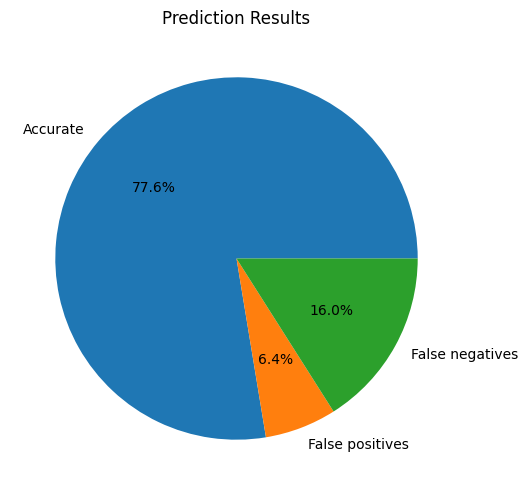

In [18]:
# Prediction accuracy pie chart
plt.figure(figsize=(6, 6))
plt.gcf().set_dpi(100)
plt.title('Prediction Results')
plt.pie([
    len(accurate),
    len(false_positives),
    len(false_negatives)
], labels=[
    'Accurate',
    'False positives',
    'False negatives'
], autopct='%.1f%%')
plt.ylabel('')
plt.show()